In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from skimage import morphology
from scipy import ndimage
import cv2
import skimage
#from functools import reduce
#from sklearn.feature_extraction import image

In [23]:
images = np.load('train_images.npy',  encoding='latin1')

In [24]:
extract = []
for i in range(len(images)):
    extract.append(images[i][1].reshape(100, 100))

In [25]:
extract_arr = np.array(extract)

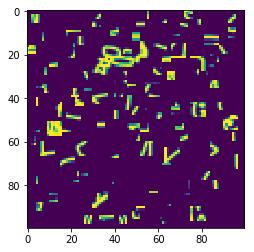

In [38]:
plt.imshow(extract_arr[2])

In [4]:
# defining global variable path
# Location of my dataset on My Google Drive
image_path = "./"
# import tensorflow as tf

def loadImages(path):
    '''Put files into lists and return them as one list with all images 
     in the folder'''
    image_files = sorted([os.path.join(path, 'train', file)
                          for file in os.listdir(path + "/train")
                          if file.endswith('.png')])
    return image_files

In [5]:
# Display two images
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.show()



In [47]:
# Preprocessing
def processing(data):
    for k in range(len(data)):
        # Reading 3 images to work
        img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    #     img = data[:3]
        try:
            print('Original size',img[0].shape)
        except AttributeError:
            print("shape not found")

        # --------------------------------
        # setting dim of the resize
        height = 220
        width = 220
        dim = (width, height)
        res_img = []
        for i in range(len(img)):
            res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
            res_img.append(res)

        # Checcking the size
        try:
            print('RESIZED', res_img[k].shape)
        except AttributeError:
            print("shape not found")


        # Visualizing one of the images in the array
        original = res_img[k]
        display_one(original)
        # ----------------------------------
        # Remove noise
        # Using Gaussian Blur
        no_noise = []
        for i in range(len(res_img)):
            blur = cv2.GaussianBlur(res_img[i], (5, 5), 0)
            no_noise.append(blur)


        image = no_noise[k]
        display(original, image, 'Original', 'Blured')
        #---------------------------------
        # Segmentation
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#         gray = image
        ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Displaying segmented images
        display(original, thresh, 'Original', 'Segmented')
        # Further noise removal (Morphology)
        kernel = np.ones((3, 3), np.uint8)
        opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

        # sure background area
        sure_bg = cv2.dilate(opening, kernel, iterations=3)

        # Finding sure foreground area
        dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
        ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

        # Finding unknown region
        sure_fg = np.uint8(sure_fg)
        unknown = cv2.subtract(sure_bg, sure_fg)

        #Displaying segmented back ground
        display(original, sure_bg, 'Original', 'Segmented Background')

        # Marker labelling
#         ret, markers = cv2.connectedComponents(sure_fg)

#         # Add one to all labels so that sure background is not 0, but 1
#         markers = markers + 1

#         # Now, mark the region of unknown with zero
#         markers[unknown == 255] = 0

#         markers = cv2.watershed(image, markers)
#         image[markers == -1] = [255, 0, 0]

#         # Displaying markers on the image
#         display(original, markers, 'Original', 'Marked')

number of FILES in dir 6
--------------------------------
List of files the first 3 in the folder:
 ['./train/1.png', './train/2.png', './train/3.png']
--------------------------------
Original size (490, 870, 3)
RESIZED (220, 220, 3)


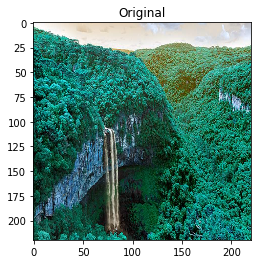

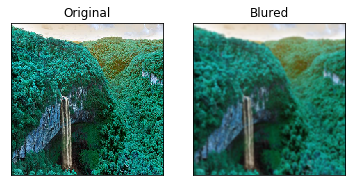

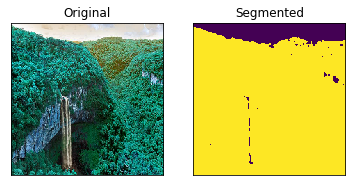

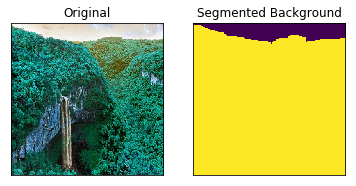

Original size (490, 870, 3)
RESIZED (220, 220, 4)


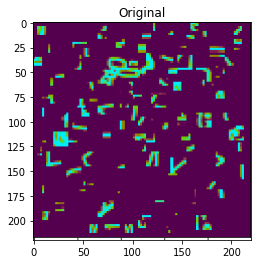

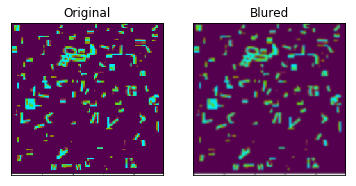

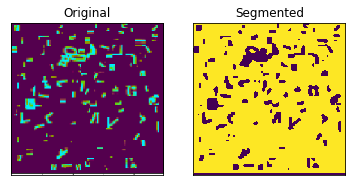

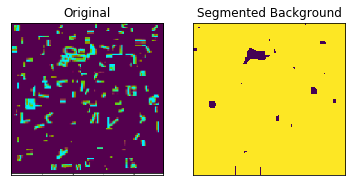

Original size (490, 870, 3)
RESIZED (220, 220, 3)


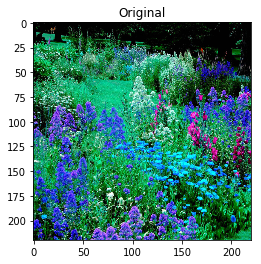

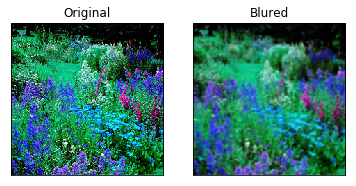

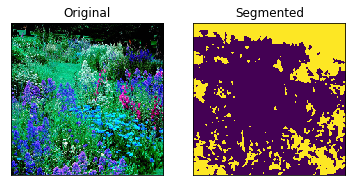

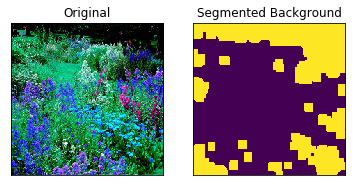

Original size (490, 870, 3)


IndexError: list index out of range

In [48]:
def main():
    # calling global variable
    global image_path
    '''The var Dataset is a list with all images in the folder '''
    dataset = loadImages(image_path)
    print('number of FILES in dir', len(dataset))
    print("--------------------------------")
    #print(cv2.imread(dataset[0]).shape)
    print("List of files the first 3 in the folder:\n",dataset[:3])
    print("--------------------------------")
    
    # sending all the images to pre-processing
    processing(dataset)
   
    #list files in directory
    #a = tf.gfile.ListDirectory('drive/My Drive/BiSeNet/dataset/train')
    #print(a)
  
main()